# Background fit 

For resonant background, we consider all possible Higgs production mechanisms: **gluon-gluon fusion (ggH)**, vector-boson fusion (VBFH), associated production with a vector boson (VH), top quarks (ttH), and **b-quarks (bbH)** where Higgs decays into two photons.

### vector-boson fusion (VBFH)

In [10]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/VBFHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"



# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)



# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet40.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_GJet40.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



NameError: name 'dibjet_mass' is not defined

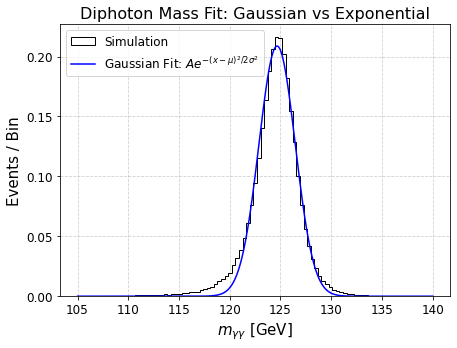

Gaussian Fit Parameters: A = 0.209, μ = 124.67 GeV, σ = 1.79 GeV
Exponential Fit Parameters: A = 0.009, B = -0.00954


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Exponential function (for comparison)
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, _ = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Fit Exponential for comparison
p0_exp = [1, 0.01]
params_exp, _ = curve_fit(exp_fit, bin_centers, hist, p0=p0_exp)

# Generate fitted curves
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)
y_exp = exp_fit(x_fit, *params_exp)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Exponential fit (for comparison)
# plt.plot(x_fit, y_exp, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian vs Exponential")
plt.grid(True, linestyle="--", alpha=0.6)

plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG.png")
plt.show()

# Print Gaussian fit parameters
print(f"Gaussian Fit Parameters: A = {params_gaussian[0]:.3f}, μ = {params_gaussian[1]:.2f} GeV, σ = {params_gaussian[2]:.2f} GeV")
print(f"Exponential Fit Parameters: A = {params_exp[0]:.3f}, B = {params_exp[1]:.5f}")


#### Crystal ball and gaussian

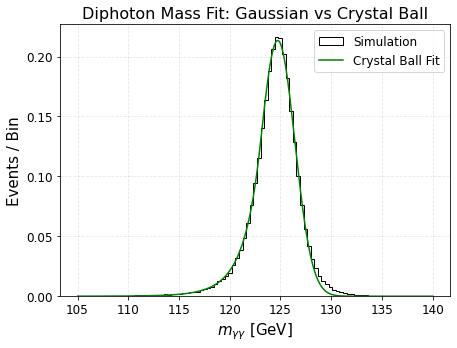

Gaussian Fit Parameters: A = 0.209, μ = 124.67 GeV, σ = 1.79 GeV
Crystal Ball Fit Parameters: A = 0.213, μ = 124.73 GeV, σ = 1.68 GeV, α = 1.05, n = 16.99


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Crystal Ball function
def crystal_ball(x, A, mu, sigma, alpha, n):
    """
    Crystal Ball function with parameters:
    - A: Amplitude
    - mu: Mean (center)
    - sigma: Width
    - alpha: Transition point between Gaussian and power-law
    - n: Power-law tail exponent
    """
    z = (x - mu) / sigma
    if isinstance(z, np.ndarray):
        mask = z > -alpha
        cb = np.zeros_like(z)
        cb[mask] = np.exp(-0.5 * z[mask]**2)  # Gaussian core
        cb[~mask] = (n / abs(alpha))**n * np.exp(-0.5 * alpha**2) / ((n / abs(alpha) - abs(alpha) - z[~mask])**n)  # Power-law tail
        return A * cb
    else:
        if z > -alpha:
            return A * np.exp(-0.5 * z**2)
        else:
            return A * (n / abs(alpha))**n * np.exp(-0.5 * alpha**2) / ((n / abs(alpha) - abs(alpha) - z)**n)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, _ = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Fit Crystal Ball function
p0_cb = [max(hist), 125, 2, 1.5, 5]  # Initial guesses: A, mu, sigma, alpha, n
params_cb, _ = curve_fit(crystal_ball, bin_centers, hist, p0=p0_cb)

# Generate fitted curves
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)
y_cb = crystal_ball(x_fit, *params_cb)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
# plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Crystal Ball fit
plt.plot(x_fit, y_cb, color="green", linestyle="-", label=r"Crystal Ball Fit")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian vs Crystal Ball")
plt.grid(True, linestyle="--", alpha=0.3)

# Save the plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG_Crystalball.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG_Crystalball.png")
plt.show()

# Print fit parameters
print(f"Gaussian Fit Parameters: A = {params_gaussian[0]:.3f}, μ = {params_gaussian[1]:.2f} GeV, σ = {params_gaussian[2]:.2f} GeV")
print(f"Crystal Ball Fit Parameters: A = {params_cb[0]:.3f}, μ = {params_cb[1]:.2f} GeV, σ = {params_cb[2]:.2f} GeV, α = {params_cb[3]:.2f}, n = {params_cb[4]:.2f}")


#### double side crystal ball

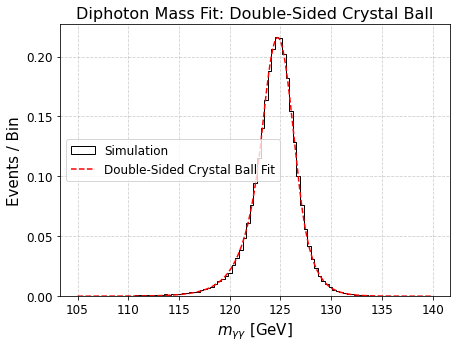

Double-Sided Crystal Ball Fit Parameters:
A = 0.216, μ = 124.73 GeV, σ = 1.63 GeV
Left Tail: α_L = 0.97, n_L = 47.52
Right Tail: α_R = 1.36, n_R = 78.06


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Double-Sided Crystal Ball (DSCB) function
def double_sided_crystal_ball(x, A, mu, sigma, alpha_L, n_L, alpha_R, n_R):
    """
    Double-Sided Crystal Ball Function
    - A: Amplitude
    - mu: Mean (center)
    - sigma: Width (Gaussian core)
    - alpha_L: Transition point for left tail
    - n_L: Power-law exponent for left tail
    - alpha_R: Transition point for right tail
    - n_R: Power-law exponent for right tail
    """
    z = (x - mu) / sigma
    abs_alpha_L = abs(alpha_L)
    abs_alpha_R = abs(alpha_R)

    if isinstance(z, np.ndarray):
        cb = np.zeros_like(z)

        # Gaussian core
        mask_core = (z > -abs_alpha_L) & (z < abs_alpha_R)
        cb[mask_core] = np.exp(-0.5 * z[mask_core]**2)

        # Left tail (power-law)
        mask_left = z <= -abs_alpha_L
        cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
                        ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)

        # Right tail (power-law)
        mask_right = z >= abs_alpha_R
        cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
                         ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)

        return A * cb
    else:
        if -abs_alpha_L < z < abs_alpha_R:
            return A * np.exp(-0.5 * z**2)
        elif z <= -abs_alpha_L:
            return A * (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / ((n_L / abs_alpha_L - abs_alpha_L - z) ** n_L)
        else:  # z >= abs_alpha_R
            return A * (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / ((n_R / abs_alpha_R - abs_alpha_R + z) ** n_R)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Double-Sided Crystal Ball
p0_dscb = [max(hist), 125, 2, 1.5, 5, 1.5, 5]  # Initial guesses: A, mu, sigma, alpha_L, n_L, alpha_R, n_R
params_dscb, _ = curve_fit(double_sided_crystal_ball, bin_centers, hist, p0=p0_dscb)

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_dscb = double_sided_crystal_ball(x_fit, *params_dscb)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
# plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# # Plot Crystal Ball fit
# plt.plot(x_fit, y_cb, color="green", linestyle="-", label=r"Crystal Ball Fit")

# Plot DSCB fit
plt.plot(x_fit, y_dscb, color="red", linestyle="--", label="Double-Sided Crystal Ball Fit")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Double-Sided Crystal Ball")
plt.grid(True, linestyle="--", alpha=0.6)

# Save the plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG_fitting_DSCB.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG_fitting_DSCB.png")
plt.show()

# Print fit parameters
print(f"Double-Sided Crystal Ball Fit Parameters:")
print(f"A = {params_dscb[0]:.3f}, μ = {params_dscb[1]:.2f} GeV, σ = {params_dscb[2]:.2f} GeV")
print(f"Left Tail: α_L = {params_dscb[3]:.2f}, n_L = {params_dscb[4]:.2f}")
print(f"Right Tail: α_R = {params_dscb[5]:.2f}, n_R = {params_dscb[6]:.2f}")


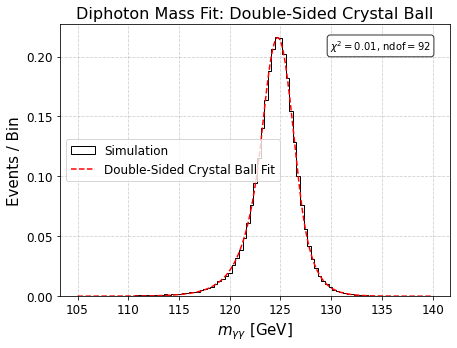

Double-Sided Crystal Ball Fit Parameters:
A = 0.216, μ = 124.73 GeV, σ = 1.63 GeV
Left Tail: α_L = 0.97, n_L = 47.52
Right Tail: α_R = 1.36, n_R = 78.06
Chi-squared: 0.012, Degrees of Freedom: 92, Reduced Chi-squared: 0.000


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Double-Sided Crystal Ball (DSCB) function
def double_sided_crystal_ball(x, A, mu, sigma, alpha_L, n_L, alpha_R, n_R):
    z = (x - mu) / sigma
    abs_alpha_L = abs(alpha_L)
    abs_alpha_R = abs(alpha_R)

    if isinstance(z, np.ndarray):
        cb = np.zeros_like(z)

        # Gaussian core
        mask_core = (z > -abs_alpha_L) & (z < abs_alpha_R)
        cb[mask_core] = np.exp(-0.5 * z[mask_core]**2)

        # Left tail (power-law)
        mask_left = z <= -abs_alpha_L
        cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
                        ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)

        # Right tail (power-law)
        mask_right = z >= abs_alpha_R
        cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
                         ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)

        return A * cb
    else:
        if -abs_alpha_L < z < abs_alpha_R:
            return A * np.exp(-0.5 * z**2)
        elif z <= -abs_alpha_L:
            return A * (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / ((n_L / abs_alpha_L - abs_alpha_L - z) ** n_L)
        else:  # z >= abs_alpha_R
            return A * (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / ((n_R / abs_alpha_R - abs_alpha_R + z) ** n_R)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Double-Sided Crystal Ball
p0_dscb = [max(hist), 125, 2, 1.5, 5, 1.5, 5]  # Initial guesses: A, mu, sigma, alpha_L, n_L, alpha_R, n_R
params_dscb, _ = curve_fit(double_sided_crystal_ball, bin_centers, hist, p0=p0_dscb)

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_dscb = double_sided_crystal_ball(x_fit, *params_dscb)

# Calculate chi-squared
y_fit_data = double_sided_crystal_ball(bin_centers, *params_dscb)
residuals = hist - y_fit_data
errors = np.sqrt(hist)  # Poisson errors (approximation)

# Avoid division by zero in empty bins
errors[errors == 0] = 1  

chi2 = np.sum((residuals / errors) ** 2)
ndof = len(hist) - len(params_dscb)  # Degrees of freedom

chi2_red = chi2 / ndof if ndof > 0 else np.nan  # Avoid division by zero

# Plot histogram and fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_dscb, color="red", linestyle="--", label="Double-Sided Crystal Ball Fit")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Double-Sided Crystal Ball")
plt.grid(True, linestyle="--", alpha=0.6)

# Add text box with fit parameters & chi-squared
# textstr = (
#     r"$A = %.3f$" "\n"
#     r"$\mu = %.2f$ GeV" "\n"
#     r"$\sigma = %.2f$ GeV" "\n"
#     r"$\alpha_L = %.2f$, $n_L = %.2f$" "\n"
#     r"$\alpha_R = %.2f$, $n_R = %.2f$" "\n"
#     r"$\chi^2 = %.2f$, $\mathrm{ndof} = %d$" "\n"
#     r"$\chi^2_{\mathrm{red}} = %.2f$"
#     % (params_dscb[0], params_dscb[1], params_dscb[2], params_dscb[3], params_dscb[4], params_dscb[5], params_dscb[6], chi2, ndof, chi2_red)
# )

# Add only chi-squared and ndof text box
# textstr = r"$\chi^2 = %.2f$, $\mathrm{ndof} = %d$" % (chi2, ndof)

# # Position text in the plot (upper-left corner)
# plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
#          verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8))


# # Position text in the plot
# plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
#          verticalalignment='top', bbox=dict(boxstyle="round,pad=0.", edgecolor="black", facecolor="white", alpha=0.8))
# Add only chi-squared and ndof text box (Top-Right Corner)
textstr = r"$\chi^2 = %.2f$, $\mathrm{ndof} = %d$" % (chi2, ndof)

# Position text in the top-right corner
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8))



# Save the plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG_fitting_DSCB.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VBFHToGG_fitting_DSCB.png")
plt.show()

# Print fit parameters and chi-squared
print(f"Double-Sided Crystal Ball Fit Parameters:")
print(f"A = {params_dscb[0]:.3f}, μ = {params_dscb[1]:.2f} GeV, σ = {params_dscb[2]:.2f} GeV")
print(f"Left Tail: α_L = {params_dscb[3]:.2f}, n_L = {params_dscb[4]:.2f}")
print(f"Right Tail: α_R = {params_dscb[5]:.2f}, n_R = {params_dscb[6]:.2f}")
print(f"Chi-squared: {chi2:.3f}, Degrees of Freedom: {ndof}, Reduced Chi-squared: {chi2_red:.3f}")


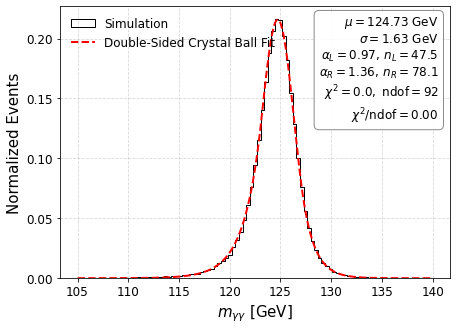

Fit Parameters:
  μ = 124.73 GeV, σ = 1.63 GeV
  α_L = 0.97, n_L = 47.5
  α_R = 1.36, n_R = 78.1
  χ² = 0.0, ndof = 92, χ²/ndof = 0.00


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib as mpl

# Optional: CMS style (if using mplhep)
# import mplhep as hep
# hep.style.use("CMS")

# Set global font parameters for better aesthetics
mpl.rcParams.update({
    "font.size": 13,
    "axes.labelsize": 15,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (7, 5),
    "text.usetex": False  # Change to True if LaTeX is enabled
})

# Define DSCB function
def double_sided_crystal_ball(x, A, mu, sigma, alpha_L, n_L, alpha_R, n_R):
    z = (x - mu) / sigma
    abs_alpha_L = abs(alpha_L)
    abs_alpha_R = abs(alpha_R)
    cb = np.zeros_like(z)

    mask_core = (z > -abs_alpha_L) & (z < abs_alpha_R)
    cb[mask_core] = np.exp(-0.5 * z[mask_core]**2)

    mask_left = z <= -abs_alpha_L
    cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
                    ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)

    mask_right = z >= abs_alpha_R
    cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
                     ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)

    return A * cb

# Histogram
bins = np.linspace(105, 140, 100)
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit
p0_dscb = [max(hist), 125, 2, 1.5, 5, 1.5, 5]
params_dscb, _ = curve_fit(double_sided_crystal_ball, bin_centers, hist, p0=p0_dscb)

# Evaluate fit
x_fit = np.linspace(105, 140, 1000)
y_dscb = double_sided_crystal_ball(x_fit, *params_dscb)
y_fit_data = double_sided_crystal_ball(bin_centers, *params_dscb)

# Chi-squared
residuals = hist - y_fit_data
errors = np.sqrt(hist)
errors[errors == 0] = 1
chi2 = np.sum((residuals / errors) ** 2)
ndof = len(hist) - len(params_dscb)
chi2_red = chi2 / ndof if ndof > 0 else np.nan

# Plot
fig, ax = plt.subplots()

ax.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
ax.plot(x_fit, y_dscb, color="red", linestyle="--", linewidth=2, label="Double-Sided Crystal Ball Fit")

# Labels
ax.set_xlabel(r"$m_{\gamma\gamma}$ [GeV]")
ax.set_ylabel("Normalized Events")
# ax.set_title("Diphoton Mass Fit", fontsize=16)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(loc="upper left", frameon=False)

# Fit parameters box
param_text = (
    rf"$\mu = {params_dscb[1]:.2f}$ GeV" + "\n" +
    rf"$\sigma = {params_dscb[2]:.2f}$ GeV" + "\n" +
    rf"$\alpha_L = {params_dscb[3]:.2f},\, n_L = {params_dscb[4]:.1f}$" + "\n" +
    rf"$\alpha_R = {params_dscb[5]:.2f},\, n_R = {params_dscb[6]:.1f}$" + "\n" +
    rf"$\chi^2 = {chi2:.1f},\ \mathrm{{ndof}} = {ndof}$" + "\n" +
    rf"$\chi^2/\mathrm{{ndof}} = {chi2_red:.2f}$"
)
ax.text(0.97, 0.97, param_text, transform=ax.transAxes,
        fontsize=12, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="gray", alpha=0.9))

# Optional CMS label (uncomment if using mplhep)
# hep.cms.label(data=False, lumi=13.6, com=13, label="Preliminary", loc=0)

# Save
output_dir = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/"
# plt.savefig(f"{output_dir}fitting_VBFHToGG_fitting_DSCB_presentation.pdf")
# plt.savefig(f"{output_dir}fitting_VBFHToGG_fitting_DSCB_presentation.png")
plt.show()

# Print results
print("Fit Parameters:")
print(f"  μ = {params_dscb[1]:.2f} GeV, σ = {params_dscb[2]:.2f} GeV")
print(f"  α_L = {params_dscb[3]:.2f}, n_L = {params_dscb[4]:.1f}")
print(f"  α_R = {params_dscb[5]:.2f}, n_R = {params_dscb[6]:.1f}")
print(f"  χ² = {chi2:.1f}, ndof = {ndof}, χ²/ndof = {chi2_red:.2f}")


In [8]:
import ROOT

# Save the fitted shape (histogram) to a ROOT file
root_file_path = "fitting_results.root"

# Create a new ROOT file
root_file = ROOT.TFile(root_file_path, "UPDATE")

# Create a histogram for the fitted function
hist_fit = ROOT.TH1F("VBFHToGG", "Fitted DSCB Shape", len(bin_edges)-1, bin_edges)

# Fill the histogram with the fitted function values
for i in range(len(bin_centers)):
    hist_fit.SetBinContent(i+1, y_dscb[i])

# Save the histogram to the ROOT file
hist_fit.Write()

# Close the ROOT file
root_file.Close()

print(f"Fitted histogram saved to {root_file_path}")



Welcome to JupyROOT 6.30/02
Fitted histogram saved to fitting_results.root


### $m_{jj}$

/tmp/sraj/ipykernel_1507550/1465116399.py:28: RuntimeWarning: invalid value encountered in double_scalars
  cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
/tmp/sraj/ipykernel_1507550/1465116399.py:29: RuntimeWarning: invalid value encountered in power
  ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)
/tmp/sraj/ipykernel_1507550/1465116399.py:32: RuntimeWarning: invalid value encountered in double_scalars
  cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
/tmp/sraj/ipykernel_1507550/1465116399.py:33: RuntimeWarning: invalid value encountered in power
  ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)


FileNotFoundError: [Errno 2] No such file or directory: '/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_dijet/fitting_VBFHToGG_DSCB_dijet_mass.pdf'

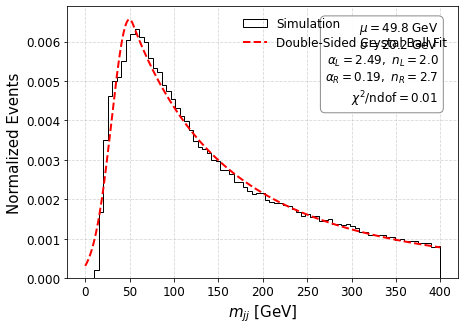

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib as mpl

# Set clean style
mpl.rcParams.update({
    "font.size": 13,
    "axes.labelsize": 15,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (7, 5),
})

# Define Double-Sided Crystal Ball function
def double_sided_crystal_ball(x, A, mu, sigma, alpha_L, n_L, alpha_R, n_R):
    z = (x - mu) / sigma
    abs_alpha_L = abs(alpha_L)
    abs_alpha_R = abs(alpha_R)
    cb = np.zeros_like(z)

    mask_core = (z > -abs_alpha_L) & (z < abs_alpha_R)
    cb[mask_core] = np.exp(-0.5 * z[mask_core]**2)

    mask_left = z <= -abs_alpha_L
    cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
                    ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)

    mask_right = z >= abs_alpha_R
    cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
                     ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)

    return A * cb

# Convert to numpy
dijet_mass_np = ak.to_numpy(dijet_mass)

# Histogram range and bins
bins = np.linspace(0, 400, 80)  # adjust range as needed
hist, bin_edges = np.histogram(dijet_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit
p0_dscb = [max(hist), 125, 20, 1.5, 3, 1.5, 3]  # initial guess for dijet
params_dscb, _ = curve_fit(double_sided_crystal_ball, bin_centers, hist, p0=p0_dscb)

# Evaluate fit
x_fit = np.linspace(bins[0], bins[-1], 1000)
y_dscb = double_sided_crystal_ball(x_fit, *params_dscb)
y_fit_data = double_sided_crystal_ball(bin_centers, *params_dscb)

# Chi-squared
residuals = hist - y_fit_data
errors = np.sqrt(hist)
errors[errors == 0] = 1
chi2 = np.sum((residuals / errors) ** 2)
ndof = len(hist) - len(params_dscb)
chi2_red = chi2 / ndof if ndof > 0 else np.nan

# Plot
fig, ax = plt.subplots()

ax.hist(dijet_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
ax.plot(x_fit, y_dscb, color="red", linestyle="--", linewidth=2, label="Double-Sided Crystal Ball Fit")

# Labels
ax.set_xlabel(r"$m_{jj}$ [GeV]")
ax.set_ylabel("Normalized Events")
# ax.set_title("Dijet Mass Fit", fontsize=16)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(loc="upper right", frameon=False)

# Fit parameter text box
param_text = (
    rf"$\mu = {params_dscb[1]:.1f}$ GeV" + "\n" +
    rf"$\sigma = {params_dscb[2]:.1f}$ GeV" + "\n" +
    rf"$\alpha_L = {params_dscb[3]:.2f},\ n_L = {params_dscb[4]:.1f}$" + "\n" +
    rf"$\alpha_R = {params_dscb[5]:.2f},\ n_R = {params_dscb[6]:.1f}$" + "\n" +
    rf"$\chi^2/\mathrm{{ndof}} = {chi2_red:.2f}$"
)
ax.text(0.95, 0.95, param_text, transform=ax.transAxes,
        fontsize=12, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="gray", alpha=0.9))

# Save
# outpath = "/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_dijet/"
plt.savefig(f"{outpath}fitting_VBFHToGG_DSCB_dijet_mass.pdf")
plt.savefig(f"{outpath}fitting_VBFHToGG_DSCB_dijet_mass.png")
plt.show()

# Print
print(f"Fitted DSCB parameters for m_jj:")
print(f"  mu = {params_dscb[1]:.2f}, sigma = {params_dscb[2]:.2f}")
print(f"  alpha_L = {params_dscb[3]:.2f}, n_L = {params_dscb[4]:.1f}")
print(f"  alpha_R = {params_dscb[5]:.2f}, n_R = {params_dscb[6]:.1f}")
print(f"  chi2/ndof = {chi2_red:.2f}")


# VHToGG

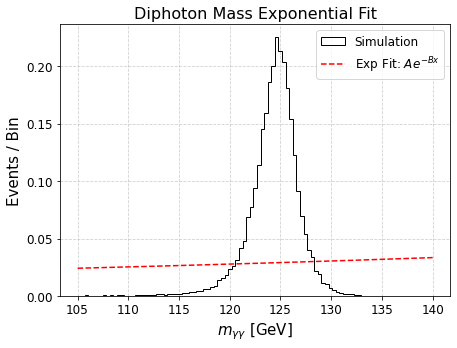

Fitted Parameters: A = 0.009, B = -0.00923


In [13]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/VHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



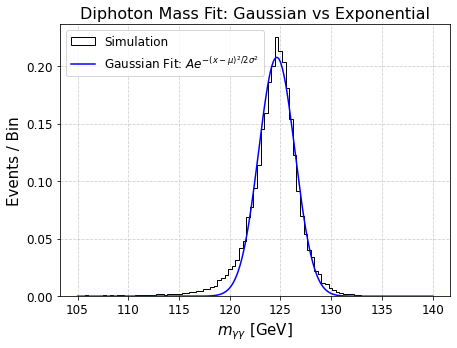

Gaussian Fit Parameters: A = 0.208, μ = 124.64 GeV, σ = 1.79 GeV
Exponential Fit Parameters: A = 0.009, B = -0.00923


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Exponential function (for comparison)
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, _ = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Fit Exponential for comparison
p0_exp = [1, 0.01]
params_exp, _ = curve_fit(exp_fit, bin_centers, hist, p0=p0_exp)

# Generate fitted curves
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)
y_exp = exp_fit(x_fit, *params_exp)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Exponential fit (for comparison)
# plt.plot(x_fit, y_exp, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian vs Exponential")
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_VHToGG.png")
plt.show()

# Print Gaussian fit parameters
print(f"Gaussian Fit Parameters: A = {params_gaussian[0]:.3f}, μ = {params_gaussian[1]:.2f} GeV, σ = {params_gaussian[2]:.2f} GeV")
print(f"Exponential Fit Parameters: A = {params_exp[0]:.3f}, B = {params_exp[1]:.5f}")


/tmp/sraj/ipykernel_1507550/1760082765.py:31: RuntimeWarning: overflow encountered in power
  ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)
/tmp/sraj/ipykernel_1507550/1760082765.py:30: RuntimeWarning: overflow encountered in double_scalars
  cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
/tmp/sraj/ipykernel_1507550/1760082765.py:30: RuntimeWarning: invalid value encountered in divide
  cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \


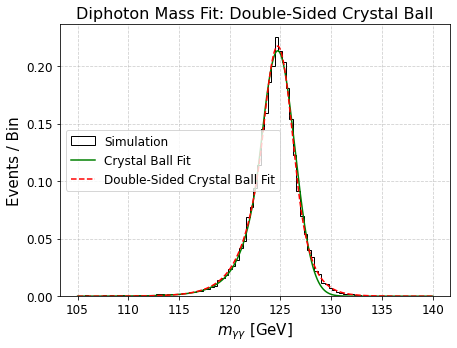

Double-Sided Crystal Ball Fit Parameters:
A = 0.217, μ = 124.72 GeV, σ = 1.56 GeV
Left Tail: α_L = 0.86, n_L = 137.93
Right Tail: α_R = 1.25, n_R = 72.11


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Double-Sided Crystal Ball (DSCB) function
def double_sided_crystal_ball(x, A, mu, sigma, alpha_L, n_L, alpha_R, n_R):
    """
    Double-Sided Crystal Ball Function
    - A: Amplitude
    - mu: Mean (center)
    - sigma: Width (Gaussian core)
    - alpha_L: Transition point for left tail
    - n_L: Power-law exponent for left tail
    - alpha_R: Transition point for right tail
    - n_R: Power-law exponent for right tail
    """
    z = (x - mu) / sigma
    abs_alpha_L = abs(alpha_L)
    abs_alpha_R = abs(alpha_R)

    if isinstance(z, np.ndarray):
        cb = np.zeros_like(z)

        # Gaussian core
        mask_core = (z > -abs_alpha_L) & (z < abs_alpha_R)
        cb[mask_core] = np.exp(-0.5 * z[mask_core]**2)

        # Left tail (power-law)
        mask_left = z <= -abs_alpha_L
        cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
                        ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)

        # Right tail (power-law)
        mask_right = z >= abs_alpha_R
        cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
                         ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)

        return A * cb
    else:
        if -abs_alpha_L < z < abs_alpha_R:
            return A * np.exp(-0.5 * z**2)
        elif z <= -abs_alpha_L:
            return A * (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / ((n_L / abs_alpha_L - abs_alpha_L - z) ** n_L)
        else:  # z >= abs_alpha_R
            return A * (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / ((n_R / abs_alpha_R - abs_alpha_R + z) ** n_R)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Double-Sided Crystal Ball
p0_dscb = [max(hist), 125, 2, 1.5, 5, 1.5, 5]  # Initial guesses: A, mu, sigma, alpha_L, n_L, alpha_R, n_R
params_dscb, _ = curve_fit(double_sided_crystal_ball, bin_centers, hist, p0=p0_dscb)

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_dscb = double_sided_crystal_ball(x_fit, *params_dscb)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
# plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Crystal Ball fit
plt.plot(x_fit, y_cb, color="green", linestyle="-", label=r"Crystal Ball Fit")

# Plot DSCB fit
plt.plot(x_fit, y_dscb, color="red", linestyle="--", label="Double-Sided Crystal Ball Fit")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Double-Sided Crystal Ball")
plt.grid(True, linestyle="--", alpha=0.6)

# Save the plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_VHToGG_fitting_DSCB.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_VHToGG_fitting_DSCB.png")
plt.show()

# Print fit parameters
print(f"Double-Sided Crystal Ball Fit Parameters:")
print(f"A = {params_dscb[0]:.3f}, μ = {params_dscb[1]:.2f} GeV, σ = {params_dscb[2]:.2f} GeV")
print(f"Left Tail: α_L = {params_dscb[3]:.2f}, n_L = {params_dscb[4]:.2f}")
print(f"Right Tail: α_R = {params_dscb[5]:.2f}, n_R = {params_dscb[6]:.2f}")


/tmp/sraj/ipykernel_1507550/3634789244.py:31: RuntimeWarning: overflow encountered in power
  ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)
/tmp/sraj/ipykernel_1507550/3634789244.py:30: RuntimeWarning: overflow encountered in double_scalars
  cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
/tmp/sraj/ipykernel_1507550/3634789244.py:30: RuntimeWarning: invalid value encountered in divide
  cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \


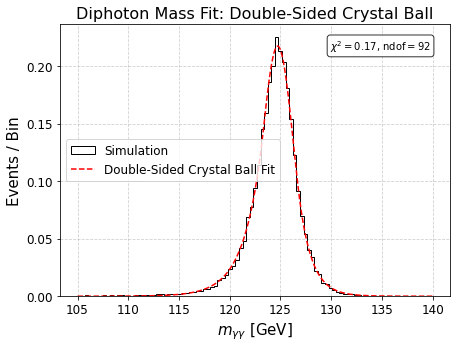

A = 0.217, μ = 124.72 GeV, σ = 1.56 GeV
Left Tail: α_L = 0.86, n_L = 137.93
Right Tail: α_R = 1.25, n_R = 72.11


In [16]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Double-Sided Crystal Ball (DSCB) function
def double_sided_crystal_ball(x, A, mu, sigma, alpha_L, n_L, alpha_R, n_R):
    """
    Double-Sided Crystal Ball Function
    - A: Amplitude
    - mu: Mean (center)
    - sigma: Width (Gaussian core)
    - alpha_L: Transition point for left tail
    - n_L: Power-law exponent for left tail
    - alpha_R: Transition point for right tail
    - n_R: Power-law exponent for right tail
    """
    z = (x - mu) / sigma
    abs_alpha_L = abs(alpha_L)
    abs_alpha_R = abs(alpha_R)

    if isinstance(z, np.ndarray):
        cb = np.zeros_like(z)

        # Gaussian core
        mask_core = (z > -abs_alpha_L) & (z < abs_alpha_R)
        cb[mask_core] = np.exp(-0.5 * z[mask_core]**2)

        # Left tail (power-law)
        mask_left = z <= -abs_alpha_L
        cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
                        ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)

        # Right tail (power-law)
        mask_right = z >= abs_alpha_R
        cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
                         ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)

        return A * cb
    else:
        if -abs_alpha_L < z < abs_alpha_R:
            return A * np.exp(-0.5 * z**2)
        elif z <= -abs_alpha_L:
            return A * (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / ((n_L / abs_alpha_L - abs_alpha_L - z) ** n_L)
        else:  # z >= abs_alpha_R
            return A * (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / ((n_R / abs_alpha_R - abs_alpha_R + z) ** n_R)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Double-Sided Crystal Ball
p0_dscb = [max(hist), 125, 2, 1.5, 5, 1.5, 5]  # Initial guesses: A, mu, sigma, alpha_L, n_L, alpha_R, n_R
params_dscb, _ = curve_fit(double_sided_crystal_ball, bin_centers, hist, p0=p0_dscb)

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_dscb = double_sided_crystal_ball(x_fit, *params_dscb)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
# plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Crystal Ball fit
# plt.plot(x_fit, y_cb, color="green", linestyle="-", label=r"Crystal Ball Fit")

# Plot DSCB fit
plt.plot(x_fit, y_dscb, color="red", linestyle="--", label="Double-Sided Crystal Ball Fit")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Double-Sided Crystal Ball")
plt.grid(True, linestyle="--", alpha=0.6)

# Compute chi-square
expected = double_sided_crystal_ball(bin_centers, *params_dscb)
chi2 = np.sum((hist - expected) ** 2 / expected)

# Degrees of freedom
ndof = len(bin_centers) - len(params_dscb)

# Add chi-square and ndof text box in the top-right corner
textstr = r"$\chi^2 = %.2f$, $\mathrm{ndof} = %d$" % (chi2, ndof)

plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8))

# Save the plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_VHToGG_fitting_DSCB.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_VHToGG_fitting_DSCB.png")
plt.show()

# Print fit parameters
# print(f"Double-Sided Crystal Ball Fit Parameters:")
print(f"A = {params_dscb[0]:.3f}, μ = {params_dscb[1]:.2f} GeV, σ = {params_dscb[2]:.2f} GeV")
print(f"Left Tail: α_L = {params_dscb[3]:.2f}, n_L = {params_dscb[4]:.2f}")
print(f"Right Tail: α_R = {params_dscb[5]:.2f}, n_R = {params_dscb[6]:.2f}")




In [17]:
# Save the fitted shape (histogram) to a ROOT file
root_file_path = "fitting_results.root"

# Create a new ROOT file
root_file = ROOT.TFile(root_file_path, "UPDATE")

# Create a histogram for the fitted function
hist_fit = ROOT.TH1F("VHToGG", "Fitted DSCB Shape", len(bin_edges)-1, bin_edges)

# Fill the histogram with the fitted function values
for i in range(len(bin_centers)):
    hist_fit.SetBinContent(i+1, y_dscb[i])

# Save the histogram to the ROOT file
hist_fit.Write()

# Close the ROOT file
root_file.Close()

print(f"Fitted histogram saved to {root_file_path}")



Fitted histogram saved to fitting_results.root


## ttH

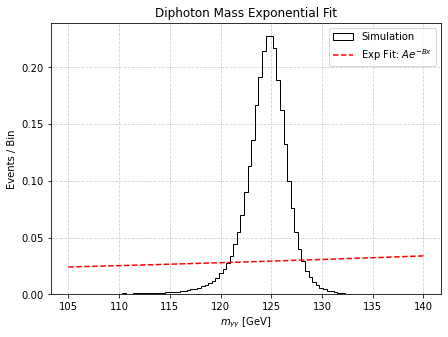

Fitted Parameters: A = 0.009, B = -0.00974


In [12]:
import uproot
import awkward as ak
from vector import Array as awk
import numpy as np

# Path to the ROOT file and tree
file_path_signal = "../../../output_root/v2_production/backgrounds/ttHToGG.root"
tree_name = "DiphotonTree/data_125_13TeV_NOTAG/"


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    
    # Extract b-jet variables
    lead_bjet_pt = tree["Res_lead_bjet_pt"].array(library="ak")    # Transverse momentum of leading b-jet
    lead_bjet_eta = tree["Res_lead_bjet_eta"].array(library="ak")  # Pseudorapidity of leading b-jet
    lead_bjet_phi = tree["Res_lead_bjet_phi"].array(library="ak")  # Azimuthal angle of leading b-jet
    lead_bjet_mass = tree["Res_lead_bjet_mass"].array(library="ak") # Mass of leading b-jet

    sublead_bjet_pt = tree["Res_sublead_bjet_pt"].array(library="ak")    # Transverse momentum of subleading b-jet
    sublead_bjet_eta = tree["Res_sublead_bjet_eta"].array(library="ak")  # Pseudorapidity of subleading b-jet
    sublead_bjet_phi = tree["Res_sublead_bjet_phi"].array(library="ak")  # Azimuthal angle of subleading b-jet
    sublead_bjet_mass = tree["Res_sublead_bjet_mass"].array(library="ak") # Mass of subleading b-jet

    # Extract dijet variables
    dijet_pt = tree["Res_dijet_pt"].array(library="ak")    # Transverse momentum of the dijet system
    dijet_eta = tree["Res_dijet_eta"].array(library="ak")  # Pseudorapidity of the dijet system
    dijet_phi = tree["Res_dijet_phi"].array(library="ak")  # Azimuthal angle of the dijet system
    dijet_mass = tree["Res_dijet_mass"].array(library="ak") # Mass of the dijet system
    
    bbgg_mass = tree["Res_HHbbggCandidate_mass"].array(library="ak")


# Load the ROOT file and extract variables
with uproot.open(file_path_signal) as file:
    tree = file[tree_name]
    lead_pho_pt = tree["lead_pt"].array(library="ak")
    lead_pho_eta = tree["lead_eta"].array(library="ak")
    lead_pho_phi = tree["lead_phi"].array(library="ak")
    sublead_pho_pt = tree["sublead_pt"].array(library="ak")
    sublead_pho_eta = tree["sublead_eta"].array(library="ak")
    sublead_pho_phi = tree["sublead_phi"].array(library="ak")

# Define the lVector function
def lVector(pt1, eta1, phi1, pt2, eta2, phi2, mass1=0, mass2=0):
    lvec_1 = awk(
        ak.zip({"pt": pt1, "eta": eta1, "phi": phi1, "mass": ak.full_like(pt1, mass1)})
    )
    lvec_2 = awk(
        ak.zip({"pt": pt2, "eta": eta2, "phi": phi2, "mass": ak.full_like(pt2, mass2)})
    )
    lvec_ = lvec_1 + lvec_2
    return lvec_

# Compute the diphoton Lorentz vector
diphoton_ = lVector(
    lead_pho_pt,
    lead_pho_eta,
    lead_pho_phi,
    sublead_pho_pt,
    sublead_pho_eta,
    sublead_pho_phi,
)


# Compute diphoton mass from its Lorentz vector
diphoton_mass = diphoton_.mass


diphoton_mass_np = ak.to_numpy(diphoton_mass)

# Convert extracted variabless to NumPy arrays
bbgg_mass_np = ak.to_numpy(bbgg_mass)
# dibjet_mass_np = ak.to_numpy(dibjet_mass)

# Compute reduced_mass
reduced_mass = bbgg_mass_np - (diphoton_mass_np - 125) - (dijet_mass - 125)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define exponential function for fitting
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit histogram data to exponential function
params, covariance = curve_fit(exp_fit, bin_centers, hist, p0=[1, 0.01])

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_fit = exp_fit(x_fit, *params)

# Plot histogram and exponential fit
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")
plt.plot(x_fit, y_fit, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Exponential Fit")
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.png")
plt.show()
# Print fit parameters
print(f"Fitted Parameters: A = {params[0]:.3f}, B = {params[1]:.5f}")



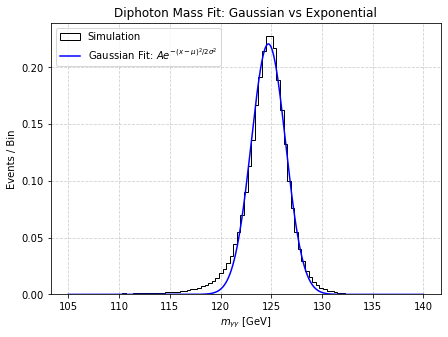

Gaussian Fit Parameters: A = 0.220, μ = 124.72 GeV, σ = 1.69 GeV
Exponential Fit Parameters: A = 0.009, B = -0.00974


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Exponential function (for comparison)
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, _ = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Fit Exponential for comparison
p0_exp = [1, 0.01]
params_exp, _ = curve_fit(exp_fit, bin_centers, hist, p0=p0_exp)

# Generate fitted curves
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)
y_exp = exp_fit(x_fit, *params_exp)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Exponential fit (for comparison)
# plt.plot(x_fit, y_exp, color="red", linestyle="--", label=r"Exp Fit: $A e^{-Bx}$")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian vs Exponential")
plt.grid(True, linestyle="--", alpha=0.6)

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG.png")
plt.show()

# Print Gaussian fit parameters
print(f"Gaussian Fit Parameters: A = {params_gaussian[0]:.3f}, μ = {params_gaussian[1]:.2f} GeV, σ = {params_gaussian[2]:.2f} GeV")
print(f"Exponential Fit Parameters: A = {params_exp[0]:.3f}, B = {params_exp[1]:.5f}")


/tmp/sraj/ipykernel_1156234/1250382806.py:35: RuntimeWarning: overflow encountered in double_scalars
  cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
/tmp/sraj/ipykernel_1156234/1250382806.py:36: RuntimeWarning: overflow encountered in power
  ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)
/tmp/sraj/ipykernel_1156234/1250382806.py:35: RuntimeWarning: invalid value encountered in divide
  cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \


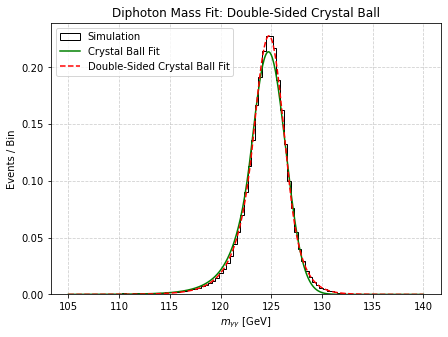

Double-Sided Crystal Ball Fit Parameters:
A = 0.227, μ = 124.77 GeV, σ = 1.55 GeV
Left Tail: α_L = 1.00, n_L = 26.29
Right Tail: α_R = 1.36, n_R = 148.91


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Double-Sided Crystal Ball (DSCB) function
def double_sided_crystal_ball(x, A, mu, sigma, alpha_L, n_L, alpha_R, n_R):
    """
    Double-Sided Crystal Ball Function
    - A: Amplitude
    - mu: Mean (center)
    - sigma: Width (Gaussian core)
    - alpha_L: Transition point for left tail
    - n_L: Power-law exponent for left tail
    - alpha_R: Transition point for right tail
    - n_R: Power-law exponent for right tail
    """
    z = (x - mu) / sigma
    abs_alpha_L = abs(alpha_L)
    abs_alpha_R = abs(alpha_R)

    if isinstance(z, np.ndarray):
        cb = np.zeros_like(z)

        # Gaussian core
        mask_core = (z > -abs_alpha_L) & (z < abs_alpha_R)
        cb[mask_core] = np.exp(-0.5 * z[mask_core]**2)

        # Left tail (power-law)
        mask_left = z <= -abs_alpha_L
        cb[mask_left] = (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / \
                        ((n_L / abs_alpha_L - abs_alpha_L - z[mask_left]) ** n_L)

        # Right tail (power-law)
        mask_right = z >= abs_alpha_R
        cb[mask_right] = (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / \
                         ((n_R / abs_alpha_R - abs_alpha_R + z[mask_right]) ** n_R)

        return A * cb
    else:
        if -abs_alpha_L < z < abs_alpha_R:
            return A * np.exp(-0.5 * z**2)
        elif z <= -abs_alpha_L:
            return A * (n_L / abs_alpha_L) ** n_L * np.exp(-0.5 * abs_alpha_L**2) / ((n_L / abs_alpha_L - abs_alpha_L - z) ** n_L)
        else:  # z >= abs_alpha_R
            return A * (n_R / abs_alpha_R) ** n_R * np.exp(-0.5 * abs_alpha_R**2) / ((n_R / abs_alpha_R - abs_alpha_R + z) ** n_R)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers

# Fit Double-Sided Crystal Ball
p0_dscb = [max(hist), 125, 2, 1.5, 5, 1.5, 5]  # Initial guesses: A, mu, sigma, alpha_L, n_L, alpha_R, n_R
params_dscb, _ = curve_fit(double_sided_crystal_ball, bin_centers, hist, p0=p0_dscb)

# Generate fitted curve
x_fit = np.linspace(105, 140, 500)
y_dscb = double_sided_crystal_ball(x_fit, *params_dscb)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(diphoton_mass_np, bins=bins, density=True, histtype="step", color="black", label="Simulation")

# Plot Gaussian fit
# plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot Crystal Ball fit
plt.plot(x_fit, y_cb, color="green", linestyle="-", label=r"Crystal Ball Fit")

# Plot DSCB fit
plt.plot(x_fit, y_dscb, color="red", linestyle="--", label="Double-Sided Crystal Ball Fit")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Double-Sided Crystal Ball")
plt.grid(True, linestyle="--", alpha=0.6)

# Save the plot
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_ttHToGG_fitting_DSCB.pdf")
plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/comparison_fitting_ttHToGG_fitting_DSCB.png")
plt.show()

# Print fit parameters
print(f"Double-Sided Crystal Ball Fit Parameters:")
print(f"A = {params_dscb[0]:.3f}, μ = {params_dscb[1]:.2f} GeV, σ = {params_dscb[2]:.2f} GeV")
print(f"Left Tail: α_L = {params_dscb[3]:.2f}, n_L = {params_dscb[4]:.2f}")
print(f"Right Tail: α_R = {params_dscb[5]:.2f}, n_R = {params_dscb[6]:.2f}")


In [15]:
# Save the fitted shape (histogram) to a ROOT file
root_file_path = "fitting_results.root"

# Create a new ROOT file
root_file = ROOT.TFile(root_file_path, "UPDATE")

# Create a histogram for the fitted function
hist_fit = ROOT.TH1F("ttHToGG", "Fitted DSCB Shape", len(bin_edges)-1, bin_edges)

# Fill the histogram with the fitted function values
for i in range(len(bin_centers)):
    hist_fit.SetBinContent(i+1, y_dscb[i])

# Save the histogram to the ROOT file
hist_fit.Write()

# Close the ROOT file
root_file.Close()

print(f"Fitted histogram saved to {root_file_path}")



Fitted histogram saved to fitting_results.root


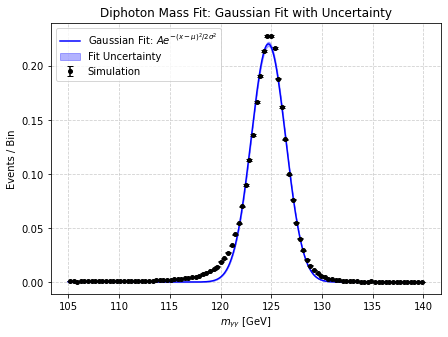

Gaussian Fit Parameters:
  A = 0.220 ± 0.002
  μ = 124.72 ± 0.02 GeV
  σ = 1.69 ± 0.02 GeV


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define Exponential function (for comparison)
def exp_fit(x, A, B):
    return A * np.exp(-B * x)

# Create histogram
bins = np.linspace(105, 140, 100)  # Adjust as needed
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin centers
bin_width = bin_edges[1] - bin_edges[0]

# Calculate Poisson errors
hist_errors = np.sqrt(hist) / np.sqrt(len(diphoton_mass_np))  # Normalized Poisson errors

# Fit Gaussian to histogram data
p0_gaussian = [max(hist), 125, 2]  # Initial guesses: peak height, mean (125 GeV), width
params_gaussian, covariance_gaussian = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Compute uncertainty band for Gaussian fit
param_errors = np.sqrt(np.diag(covariance_gaussian))
x_fit = np.linspace(105, 140, 500)
y_gaussian = gaussian(x_fit, *params_gaussian)

# Generate confidence interval band (propagating uncertainty in parameters)
A_err, mu_err, sigma_err = param_errors
y_gaussian_upper = gaussian(x_fit, params_gaussian[0] + A_err, params_gaussian[1], params_gaussian[2])
y_gaussian_lower = gaussian(x_fit, params_gaussian[0] - A_err, params_gaussian[1], params_gaussian[2])

# Plot histogram with error bars
plt.figure(figsize=(7, 5))
plt.errorbar(bin_centers, hist, yerr=hist_errors, fmt="o", color="black", label="Simulation", markersize=4, capsize=3)

# Plot Gaussian fit
plt.plot(x_fit, y_gaussian, color="blue", linestyle="-", label=r"Gaussian Fit: $A e^{-(x-\mu)^2 / 2\sigma^2}$")

# Plot uncertainty band
plt.fill_between(x_fit, y_gaussian_lower, y_gaussian_upper, color="blue", alpha=0.3, label="Fit Uncertainty")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit: Gaussian Fit with Uncertainty")
plt.grid(True, linestyle="--", alpha=0.6)

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG_with_uncertainty.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG_with_uncertainty.png")
plt.show()

# Print Gaussian fit parameters with uncertainties
print(f"Gaussian Fit Parameters:")
print(f"  A = {params_gaussian[0]:.3f} ± {A_err:.3f}")
print(f"  μ = {params_gaussian[1]:.2f} ± {mu_err:.2f} GeV")
print(f"  σ = {params_gaussian[2]:.2f} ± {sigma_err:.2f} GeV")


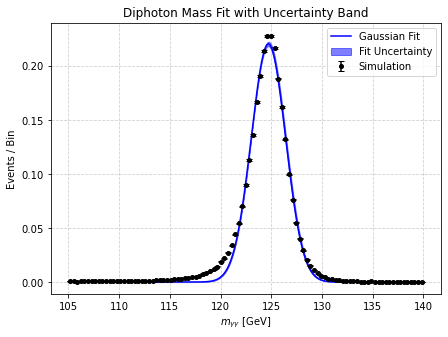

Gaussian Fit Parameters:
  A = 0.220 ± 0.002
  μ = 124.72 ± 0.02 GeV
  σ = 1.69 ± 0.02 GeV


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Create histogram
bins = np.linspace(105, 140, 100)
hist, bin_edges = np.histogram(diphoton_mass_np, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  
bin_width = bin_edges[1] - bin_edges[0]

# Poisson errors
hist_errors = np.sqrt(hist) / np.sqrt(len(diphoton_mass_np))

# Fit Gaussian
p0_gaussian = [max(hist), 125, 2]
params_gaussian, covariance_gaussian = curve_fit(gaussian, bin_centers, hist, p0=p0_gaussian)

# Get parameter errors
param_errors = np.sqrt(np.diag(covariance_gaussian))
A_err, mu_err, sigma_err = param_errors
A_fit, mu_fit, sigma_fit = params_gaussian

# Generate fitted Gaussian curve
x_fit = np.linspace(105, 140, 500)
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)

# Generate upper and lower uncertainty bounds
y_fit_upper = gaussian(x_fit, A_fit + A_err, mu_fit + mu_err, sigma_fit + sigma_err)
y_fit_lower = gaussian(x_fit, A_fit - A_err, mu_fit - mu_err, sigma_fit - sigma_err)

# Plot histogram with error bars
plt.figure(figsize=(7, 5))
plt.errorbar(bin_centers, hist, yerr=hist_errors, fmt="o", color="black", label="Simulation", markersize=4, capsize=3)

# Plot Gaussian fit
plt.plot(x_fit, y_fit, color="blue", linestyle="-", label="Gaussian Fit")

# Plot uncertainty band
plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color="blue", alpha=0.5, label="Fit Uncertainty")

# Labels and formatting
plt.xlabel(r"$m_{\gamma\gamma}$ [GeV]")
plt.ylabel("Events / Bin")
plt.legend()
plt.title("Diphoton Mass Fit with Uncertainty Band")
plt.grid(True, linestyle="--", alpha=0.6)

# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG_uncertainty.pdf")
# plt.savefig("/afs/cern.ch/user/s/sraj/sraj/www/CUA/HH-bbgg/stat_study/background_diphoton/fitting_ttHToGG_uncertainty.png")
plt.show()

# Print Gaussian fit parameters with uncertainties
print(f"Gaussian Fit Parameters:")
print(f"  A = {A_fit:.3f} ± {A_err:.3f}")
print(f"  μ = {mu_fit:.2f} ± {mu_err:.2f} GeV")
print(f"  σ = {sigma_fit:.2f} ± {sigma_err:.2f} GeV")


# Convert to RooFit PDF

In [18]:
import ROOT

# Open the ROOT file
root_file_path = "fitting_results.root"
root_file = ROOT.TFile(root_file_path, "READ")

# List objects in the file
root_file.ls()

# Retrieve the correct histogram
hist_fit = root_file.Get("NMSSM_X400_Y125")

# Verify that the histogram was retrieved correctly
if not hist_fit or not isinstance(hist_fit, ROOT.TH1):
    print("Error: Histogram 'NMSSM_X400_Y125' not found or is not a valid TH1 object!")
    exit()

# Define the observable (diphoton mass)
mass = ROOT.RooRealVar("mgg", "Diphoton Mass (GeV)", 100, 140)

# Convert histogram to a RooFit PDF
roo_hist = ROOT.RooDataHist("NMSSM_X400_Y125", "Fitted Crystal Ball Shape", ROOT.RooArgList(mass), hist_fit)
pdf = ROOT.RooHistPdf("pdf_fit", "Crystal Ball Fit PDF", ROOT.RooArgSet(mass), roo_hist)

# Create a workspace
workspace = ROOT.RooWorkspace("w")
getattr(workspace, "import")(pdf)  # Import the PDF into the workspace
workspace.Write()
workspace.Print()

# Save the workspace into a new ROOT file for Combine
workspace_file = ROOT.TFile("workspace.root", "RECREATE")
workspace.Write()
workspace_file.Close()

print("Workspace saved as workspace.root")


Workspace saved as workspace.root
TFile**		fitting_results.root	
 TFile*		fitting_results.root	
  KEY: TH1F	NMSSM_X400_Y125;1	Fitted Crystal Ball Shape
  KEY: TH1F	GGJets;1	Fitted DSCB Shape
  KEY: TH1F	GJetPt40;1	Fitted DSCB Shape
  KEY: TH1F	GJetPt20To40;1	Fitted DSCB Shape
  KEY: TH1F	VBFHToGG;1	Fitted DSCB Shape
  KEY: TH1F	VHToGG;1	Fitted DSCB Shape
  KEY: TH1F	ttHToGG;1	Fitted DSCB Shape
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset NMSSM_X400_Y125
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooHistPdf::pdf_fit
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::mgg

RooWorkspace(w) w contents

variables
---------
(mgg)

p.d.f.s
-------
RooHistPdf::pdf_fit[ pdfObs=(mgg) ] = 0.0499141

embedded datasets (in pdfs and functions)
-----------------------------------------
RooDataHist::NMSSM_X400_Y125(mgg)



Error in <TFile::WriteTObject>: Directory fitting_results.root is not writable


In [19]:
import ROOT

# Open the ROOT file
root_file_path = "fitting_results.root"
root_file = ROOT.TFile(root_file_path, "READ")

# List all objects in the file
root_file.ls()

# Define the observable (diphoton mass)
mass = ROOT.RooRealVar("mgg", "Diphoton Mass (GeV)", 100, 140)

# Create a workspace
workspace = ROOT.RooWorkspace("w")

# List of histogram names to include
histogram_names = [
    "GGJets",
    "GJetPt40",
    "GJetPt20To40",
    "VBFHToGG",
    "VHToGG",
    "ttHToGG",
    "NMSSM_X400_Y125"
    "data_obs"
]

# Loop over histograms and add them to the workspace
for hist_name in histogram_names:
    hist_fit = root_file.Get(hist_name)
    
    # Check if the histogram exists and is valid
    if not hist_fit or not isinstance(hist_fit, ROOT.TH1):
        print(f"Warning: Histogram '{hist_name}' not found or invalid. Skipping...")
        continue

    # Convert histogram to a RooDataHist
    roo_hist = ROOT.RooDataHist(hist_name, f"Fitted shape for {hist_name}", ROOT.RooArgList(mass), hist_fit)
    
    # Convert to a RooHistPdf
    pdf = ROOT.RooHistPdf(f"pdf_{hist_name}", f"PDF for {hist_name}", ROOT.RooArgSet(mass), roo_hist)
    
    # Import the PDF into the workspace
    getattr(workspace, "import")(pdf)
    print(f"Added histogram '{hist_name}' to the workspace.")

# Save the workspace into a new ROOT file for Combine
workspace_file = ROOT.TFile("workspace.root", "RECREATE")
workspace.Write()
workspace_file.Close()

print("Workspace saved as workspace.root")


Added histogram 'GGJets' to the workspace.
Added histogram 'GJetPt40' to the workspace.
Added histogram 'GJetPt20To40' to the workspace.
Added histogram 'VBFHToGG' to the workspace.
Added histogram 'VHToGG' to the workspace.
Added histogram 'ttHToGG' to the workspace.
Workspace saved as workspace.root
TFile**		fitting_results.root	
 TFile*		fitting_results.root	
  KEY: TH1F	NMSSM_X400_Y125;1	Fitted Crystal Ball Shape
  KEY: TH1F	GGJets;1	Fitted DSCB Shape
  KEY: TH1F	GJetPt40;1	Fitted DSCB Shape
  KEY: TH1F	GJetPt20To40;1	Fitted DSCB Shape
  KEY: TH1F	VBFHToGG;1	Fitted DSCB Shape
  KEY: TH1F	VHToGG;1	Fitted DSCB Shape
  KEY: TH1F	ttHToGG;1	Fitted DSCB Shape
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(GGJets): fit range of variable mgg expanded to nearest bin boundaries: [100,140] --> [105,140]
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset GGJets
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooHistPdf::pdf_GGJets
[#1] INFO:ObjectHandling

In [1]:
root_file = ROOT.TFile("workspace.root", "READ")
root_file.ls()


NameError: name 'ROOT' is not defined

# including asimov dataset

In [ ]:
import ROOT

# Open the ROOT file containing signal and background histograms
root_file_path = "fitting_results.root"
root_file = ROOT.TFile(root_file_path, "READ")

# Define the observable (diphoton mass)
mass = ROOT.RooRealVar("mgg", "Diphoton Mass (GeV)", 100, 140)

# Retrieve and convert signal histogram
hist_signal = root_file.Get("NMSSM_X400_Y125")  # Signal
roo_hist_signal = ROOT.RooDataHist("hist_signal", "Signal Histogram", ROOT.RooArgList(mass), hist_signal)
pdf_signal = ROOT.RooHistPdf("pdf_signal", "Signal PDF", ROOT.RooArgSet(mass), roo_hist_signal)

# Retrieve and convert background histograms
backgrounds = ["GGJets", "GJetPt40", "GJetPt20To40", "VBFHToGG", "VHToGG", "ttHToGG"]
pdf_backgrounds = []
coefficients = []

for i, name in enumerate(backgrounds):
    hist = root_file.Get(name)
    if not hist:
        print(f"Warning: Histogram {name} not found in ROOT file!")
        continue
    
    roo_hist = ROOT.RooDataHist(f"hist_bg_{i}", f"{name} Histogram", ROOT.RooArgList(mass), hist)
    pdf_bg = ROOT.RooHistPdf(f"pdf_bg_{i}", f"{name} PDF", ROOT.RooArgSet(mass), roo_hist)
    
    pdf_backgrounds.append(pdf_bg)
    
    # Background fractions (free parameters)
    coef = ROOT.RooRealVar(f"coef_bg_{i}", f"Fraction of {name}", hist.Integral(), 0, 1e6)
    coefficients.append(coef)

# Create summed background model (if multiple backgrounds exist)
if len(pdf_backgrounds) > 1:
    pdf_bkg = ROOT.RooAddPdf("pdf_bkg", "Total Background PDF", ROOT.RooArgList(*pdf_backgrounds), ROOT.RooArgList(*coefficients))
elif len(pdf_backgrounds) == 1:
    pdf_bkg = pdf_backgrounds[0]
else:
    raise RuntimeError("No valid background histograms found!")

# Generate Asimov dataset (expected data = signal + background)
n_expected = hist_signal.Integral() + sum(hist.Integral() for hist in [root_file.Get(name) for name in backgrounds if root_file.Get(name)])
asimov_data = pdf_bkg.generate(ROOT.RooArgSet(mass), int(n_expected))

# Create a workspace and import all objects
workspace = ROOT.RooWorkspace("w")
getattr(workspace, "import")(pdf_signal)
getattr(workspace, "import")(pdf_bkg)
getattr(workspace, "import")(asimov_data, ROOT.RooFit.Rename("data_obs"))  # Import Asimov dataset as "data_obs"

# Save workspace
workspace_file = ROOT.TFile("workspace.root", "RECREATE")
workspace.Write()
workspace_file.Close()

print("Workspace saved as workspace.root")
